Adınız: Zeynep

Soyadınız: Söylemez

Okul Numarası: 2212721031

GitHub Repo Bağlantısı: https://github.com/zeynep-35/CNN_siniflandirma

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from google.colab import drive

# 1. Google Drive'ı Bağlıyoruz
drive.mount('/content/drive')

# 2. Veri Seti Yolu
dataset_path = '/content/drive/MyDrive/makine_ogrenmesi_odev_1'

# Kontrol
if os.path.exists(dataset_path):
    print(f"\n✅ Veri seti yolu doğrulandı: {dataset_path}")
else:
    print("\n❌ HATA: Klasör bulunamadı! Drive yolunu kontrol et.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ Veri seti yolu doğrulandı: /content/drive/MyDrive/makine_ogrenmesi_odev_1


In [ ]:
# Veriyi normalize et (0-1 arasına getir) ve %20 validasyon ayır
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Eğitim Seti
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,          # Model 2 için batch 32 standarttır
    class_mode='binary',
    subset='training'
)

# Test/Doğrulama Seti
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 128 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
model = Sequential()

# 1. Blok
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. Blok
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Blok
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Düzleştirme ve Karar
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Ezberlemeyi önlemek için

# Çıkış
model.add(Dense(1, activation='sigmoid'))

# Derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5490 - loss: 1.0020 - val_accuracy: 0.5000 - val_loss: 0.7116
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5156 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5500 - loss: 0.6829 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5667 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6042 - loss: 0.6756 - val_accuracy: 0.6562 - val_loss: 0.6846
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5063 - loss: 0.6806 - val_accuracy: 0.5312 - val_loss: 0.6885
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6500 - loss: 0.6494 - val_accuracy: 0.5000 - val_loss: 0.7151
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6458 - loss: 0.6245 - val_accuracy: 0.5000 - val_loss: 0.7637
Epoch 9/

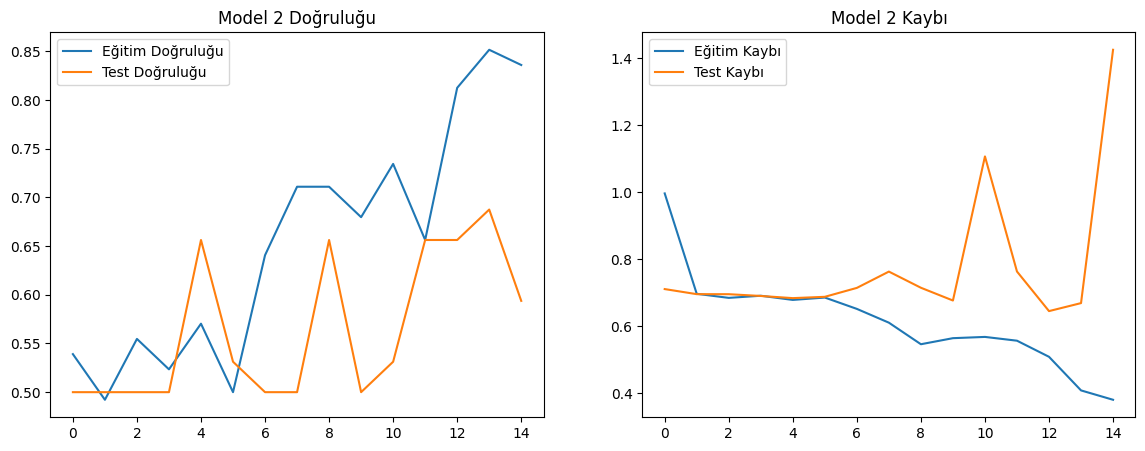

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5938 - loss: 1.4257

--------------------------------------
✅ Model 2 (Basit CNN) Test Başarısı : %59.38
📉 Model 2 (Basit CNN) Test Kaybı    : 1.4257
--------------------------------------


In [ ]:
# Grafikler
plt.figure(figsize=(14, 5))

# Doğruluk
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.title('Model 2 Doğruluğu')
plt.legend()

# Kayıp
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.title('Model 2 Kaybı')
plt.legend()

plt.show()

# Final Sonucu Yazdır
test_loss, test_acc = model.evaluate(validation_generator)
print(f"\n--------------------------------------")
print(f"✅ Model 2 (Basit CNN) Test Başarısı : %{test_acc*100:.2f}")
print(f"📉 Model 2 (Basit CNN) Test Kaybı    : {test_loss:.4f}")
print(f"--------------------------------------")